In [1]:
!pip install openvino

     |████████████████████████████████| 28.3MB 113kB/s 


In [2]:
from openvino.inference_engine import IENetwork 
from openvino.inference_engine import IECore
import warnings
from google.colab.patches import cv2_imshow
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
def load_IR_to_IE(model_xml):
    ### Load the Inference Engine API
    plugin = IECore()
    ### Loading the IR files to IENetwork class
    model_bin = model_xml[:-3]+"bin" 
    network = IENetwork(model=model_xml, weights=model_bin)
    ### Loading the network
    executable_net = plugin.load_network(network,"CPU")
    print("Network succesfully loaded into the Inference Engine")
    return executable_net

In [4]:
def synchronous_inference(executable_net, image):
    ### Get the input blob for the inference request
    input_blob = next(iter(executable_net.inputs))
    ### Perform Synchronous Inference
    result = executable_net.infer(inputs = {input_blob: image})
    return result

Network succesfully loaded into the Inference Engine


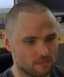

age is:22


In [7]:
#age detection age-gender-recognition-retail-0013
en = load_IR_to_IE('age.xml')
import cv2
image = cv2.imread('age1.png')
#face_img = cv2.dnn.blobFromImage(image, 1./127.5, (128, 128), (1, 1, 1), True)
resized = cv2.resize(image, (62,62), interpolation = cv2.INTER_AREA)

from torchvision import transforms
tran = transforms.ToTensor()  # Convert the numpy array or PIL.Image read image to (C, H, W) Tensor format and /255 normalize to [0, 1.0]
img_tensor = tran(resized)
##
img_tensor = img_tensor.unsqueeze_(0)
##
#print(img_tensor.size())  # (C,H, W), channel order (B, G, R)

res = synchronous_inference(en, img_tensor)
cv2_imshow(cv2.imread('age1.png'))
print("age is:"+str(round(res['age_conv3'][0][0][0][0]*100)))

Network succesfully loaded into the Inference Engine


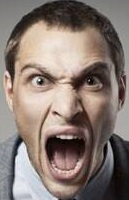

In [29]:
#emotion detection emotions-recognition-retail-0003
en = load_IR_to_IE('emo.xml')
import cv2
image = cv2.imread('angry.jpg')
#face_img = cv2.dnn.blobFromImage(image, 1./127.5, (128, 128), (1, 1, 1), True)
resized = cv2.resize(image, (64,64), interpolation = cv2.INTER_AREA)

from torchvision import transforms
tran = transforms.ToTensor()  # Convert the numpy array or PIL.Image read image to (C, H, W) Tensor format and /255 normalize to [0, 1.0]
img_tensor = tran(resized)
##
img_tensor = img_tensor.unsqueeze_(0)
##
#print(img_tensor.size())  # (C,H, W), channel order (B, G, R)

res = synchronous_inference(en, img_tensor)
cv2_imshow(cv2.imread('angry.jpg'))
#print("age is:"+str(round(res['age_conv3'][0][0][0][0]*100)))

In [30]:
res

{'prob_emotion': array([[[[0.4041566 ]],
 
         [[0.05913005]],
 
         [[0.3345698 ]],
 
         [[0.1348595 ]],
 
         [[0.067284  ]]]], dtype=float32)}

Network succesfully loaded into the Inference Engine


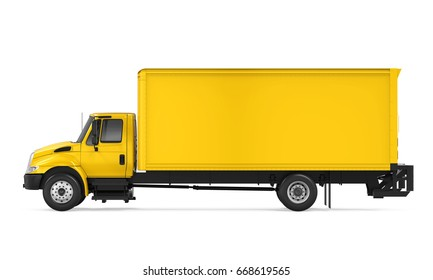

In [12]:
#vehicle detection
en = load_IR_to_IE('vehicle.xml')
import cv2
image = cv2.imread('truck.jpg')
resized = cv2.resize(image, (72,72), interpolation = cv2.INTER_AREA)

from torchvision import transforms
tran = transforms.ToTensor()  # Convert the numpy array or PIL.Image read image to (C, H, W) Tensor format and /255 normalize to [0, 1.0]
img_tensor = tran(resized)
img_tensor = img_tensor.unsqueeze_(0)

res = synchronous_inference(en, img_tensor)
cv2_imshow(cv2.imread('truck.jpg'))
#print("age is:"+str(round(res['age_conv3'][0][0][0][0]*100)))

In [13]:
res

{'color': array([[[[4.6988040e-05]],
 
         [[1.5917648e-02]],
 
         [[2.1008018e-05]],
 
         [[1.9413135e-04]],
 
         [[2.1813345e-05]],
 
         [[3.2893490e-04]],
 
         [[9.8346949e-01]]]], dtype=float32),
 'type': array([[[[9.9991262e-01]],
 
         [[4.2722922e-06]],
 
         [[1.7870394e-05]],
 
         [[6.5205124e-05]]]], dtype=float32)}

Network succesfully loaded into the Inference Engine


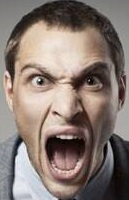

In [16]:
#facial landmarks, landmarks-regression-retail-0009, https://github.com/openvinotoolkit/open_model_zoo/tree/master/models/intel/landmarks-regression-retail-0009
en = load_IR_to_IE('landmarks.xml')
import cv2
image = cv2.imread('angry.jpg')
resized = cv2.resize(image, (48,48), interpolation = cv2.INTER_AREA)

from torchvision import transforms
tran = transforms.ToTensor()  # Convert the numpy array or PIL.Image read image to (C, H, W) Tensor format and /255 normalize to [0, 1.0]
img_tensor = tran(resized)
img_tensor = img_tensor.unsqueeze_(0)

res = synchronous_inference(en, img_tensor)
cv2_imshow(cv2.imread('angry.jpg'))


In [17]:
res

{'95': array([[[[0.3094451 ]],
 
         [[0.5596271 ]],
 
         [[0.4989156 ]],
 
         [[0.4330375 ]],
 
         [[0.4257861 ]],
 
         [[0.6685071 ]],
 
         [[0.43725345]],
 
         [[0.84689236]],
 
         [[0.6643069 ]],
 
         [[0.74963987]]]], dtype=float32)}

In [35]:
#plot landmarks
import cv2
image = cv2.imread('angry.jpg')
image = cv2.circle(image, (int(0.3094451*200),int(0.5596271*129)), radius=2, color=(0, 0, 255), thickness=-1)
image = cv2.circle(image, (int(0.4330375*200),int(0.4257861*129)), radius=2, color=(0, 0, 255), thickness=-1)
image = cv2.circle(image, (int(0.4257861*200),int(0.6685071*129)), radius=2, color=(0, 0, 255), thickness=-1)
image = cv2.circle(image, (int(0.43725345*200),int(0.84689236*129)), radius=2, color=(0, 0, 255), thickness=-1)
image = cv2.circle(image, (int(0.6643069*200),int(0.74963987*129)), radius=2, color=(0, 0, 255), thickness=-1)